## Regrillado de la elevación del parque según los datos de precipitación

**PROYECTO:** SISTEMA PARA EL SEGUIMIENTO DE ECOSISTEMAS VENEZOLANOS \
**AUTOR:** Javier Martinez

In [9]:
import metview as mv
import rioxarray 
import xarray
from shapely.geometry import (Polygon, mapping)
import geopandas

mv.setoutput('jupyter', output_font_scale=1.5, plot_widget=False)

In [10]:
import warnings
warnings.filterwarnings('ignore')

#### Procipitación

* Cargando los datos de precipitación

In [11]:
precipitacion_rds = rioxarray.open_rasterio('./cerro_saroche/cdsapi/total_precipitation.grib',
                              masked=True
                              )\
                              .squeeze()
precipitacion_rds

ERROR: Ran out of file reading SECT0


<xarray.DataArray (band: 626, y: 6, x: 9)>
array([[[8.980518e-04, 8.823256e-04, ..., 1.283392e-03, 1.509335e-03],
        [8.349285e-04, 8.685413e-04, ..., 1.356584e-03, 1.509566e-03],
        ...,
        [1.197629e-03, 1.313122e-03, ..., 1.234983e-03, 1.066873e-03],
        [1.396046e-03, 1.569776e-03, ..., 1.909983e-03, 1.519635e-03]],

       [[8.402613e-05, 1.015620e-04, ..., 5.360890e-04, 6.948270e-04],
        [5.973369e-05, 6.628683e-05, ..., 4.189440e-04, 5.359502e-04],
        ...,
        [1.597060e-04, 1.483062e-04, ..., 2.820735e-04, 2.851276e-04],
        [3.760731e-04, 3.905768e-04, ..., 6.381705e-04, 5.653336e-04]],

       ...,

       [[5.542696e-05, 5.805693e-05, ..., 3.278593e-04, 3.897080e-04],
        [3.870256e-05, 3.939524e-05, ..., 2.555122e-04, 3.072745e-04],
        ...,
        [6.562634e-05, 5.653282e-05, ..., 1.281083e-04, 1.101921e-04],
        [2.444326e-04, 2.006211e-04, ..., 1.149997e-04, 9.224445e-05]],

       [[3.198701e-04, 3.340861e-04, ..., 7.532817e-04, 9.615435e-04],
        [2.540774e-04, 2.635956e-04, ..., 6.392719e-04, 7.868893e-04],
        ...,
        [3.195609e-04, 3.047884e-04, ..., 3.675265e-04, 3.797908e-04],
        [1.043903e-03, 7.949473e-04, ..., 3.816898e-04, 3.762569e-04]]])
Coordinates:
  * band         (band) int64 1 2 3 4 5 6 7 8 ... 620 621 622 623 624 625 626
  * x            (x) float64 -70.03 -69.93 -69.83 ... -69.43 -69.33 -69.23
  * y            (y) float64 10.41 10.31 10.21 10.11 10.01 9.91
    spatial_ref  int64 0
Attributes:
    GRIB_COMMENT:           Total precipitation [m]
    GRIB_ELEMENT:           TP
    GRIB_FORECAST_SECONDS:  86400
    GRIB_REF_TIME:          0
    GRIB_SHORT_NAME:        0-SFC
    GRIB_UNIT:              [m]
    GRIB_VALID_TIME:        86400
    scale_factor:           1.0
    add_offset:             0.0
    long_name:              0[-] SFC (Ground or water surface)

In [12]:
# proyeccion
precipitacion_rds.rio.crs

CRS.from_wkt('GEOGCS["Coordinate System imported from GRIB file",DATUM["unnamed",SPHEROID["Sphere",6367470,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]')

In [13]:
# cambio de m a mm
precipitacion_rds['precipitacion_mm'] = 1000 * precipitacion_rds

In [41]:
import pandas as pd
from datetime import datetime

# Asignado datetime
date_range = pd.date_range(start='1970-01-01',
                          periods=precipitacion_rds.band.values.shape[0],
                          freq='M')

date_range = list(map(lambda x: datetime.strptime( str(x)[:8]+'01', '%Y-%m-%d' ).toordinal(),
                      date_range
                      ))

In [48]:
len(precipitacion_rds.band.values.tolist())

626

In [49]:
len(date_range)

626

In [57]:
precipitacion_rds.isel(band=1).precipitacion_mm.values

array([[0.08402613, 0.10156201, 0.13190461, 0.17029699, 0.22665644,
        0.28714427, 0.39460929, 0.53608901, 0.694827  ],
       [0.05973369, 0.06628683, 0.08127844, 0.11299935, 0.16177824,
        0.22014609, 0.30308409, 0.41894399, 0.53595018],
       [0.06704772, 0.06399758, 0.07641042, 0.10097498, 0.14436041,
        0.19290537, 0.25851501, 0.33424702, 0.42259024],
       [0.10125857, 0.09361561, 0.10626781, 0.12937031, 0.16589271,
        0.20785216, 0.24662749, 0.29016234, 0.32932509],
       [0.15970599, 0.14830619, 0.16487553, 0.19082136, 0.22650394,
        0.26490376, 0.28412533, 0.28207351, 0.28512761],
       [0.37607312, 0.39057684, 0.43943996, 0.49451023, 0.58425049,
        0.67152071, 0.68290491, 0.63817052, 0.56533364]])

In [79]:
precipitacion_rds.band.values

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

[[0.08402613457292318,
  0.10156200733035803,
  0.13190461322665215,
  0.17029698938131332,
  0.22665644064545631,
  0.287144270259887,
  0.3946092911064625,
  0.5360890063457191,
  0.6948270020075142],
 [0.05973369115963578,
  0.06628682604059577,
  0.08127844193950295,
  0.11299934703856707,
  0.16177823999896646,
  0.22014608839526772,
  0.30308408895507455,
  0.41894399328157306,
  0.5359501810744405],
 [0.06704771658405662,
  0.06399757694453001,
  0.07641041884198785,
  0.10097498307004571,
  0.14436041237786412,
  0.1929053687490523,
  0.2585150068625808,
  0.33424701541662216,
  0.4225902375765145],
 [0.10125857079401612,
  0.09361561387777328,
  0.1062678056769073,
  0.1293703098781407,
  0.1658927067182958,
  0.2078521647490561,
  0.24662748910486698,
  0.29016233747825027,
  0.3293250920251012],
 [0.1597059890627861,
  0.14830619329586625,
  0.16487552784383297,
  0.1908213598653674,
  0.22650393657386303,
  0.26490376330912113,
  0.28412532992661,
  0.28207350987941027,
  0

In [88]:
band = precipitacion_rds.band.values.tolist()

fieldset_precipitacion = []
for i in range(0,len(band)-1):
  fieldset_precipitacion.append({"gridType": "regular_ll",
                                  "Nx": len(precipitacion_rds.x.values.tolist()),
                                  "Ny": len(precipitacion_rds.y.values.tolist()),
                                  "distinctLatitudes": precipitacion_rds.y.values.tolist(),
                                  "distinctLongitudes": precipitacion_rds.x.values.tolist(),
                                  "paramId": band[i],
                                  "shortName": f"precipitacion",
                                  "values": precipitacion_rds.isel(band=band[i]).precipitacion_mm.values.tolist(),
                                  "dataDate": date_range[i],
                                  "dataTime": 0000
                                  })

ds_precipitacion = xarray.open_dataset(fieldset_precipitacion, engine="cfgrib")
ds_precipitacion = ds_precipitacion.rio.write_crs(precipitacion_rds.rio.crs)

In [39]:
precipitacion_rds.expand_dims(dim="time")

<xarray.DataArray (time: 1, band: 626, y: 6, x: 9)>
array([[[[8.98051774e-04, 8.82325578e-04, 8.69311392e-04, ...,
          1.08672411e-03, 1.28339231e-03, 1.50933524e-03],
         [8.34928476e-04, 8.68541305e-04, 9.13065393e-04, ...,
          1.20328693e-03, 1.35658367e-03, 1.50956598e-03],
         [8.78330320e-04, 9.61721293e-04, 1.03350123e-03, ...,
          1.27656176e-03, 1.33442937e-03, 1.41354604e-03],
         [1.03060051e-03, 1.12604024e-03, 1.22949877e-03, ...,
          1.30058825e-03, 1.26145128e-03, 1.20848604e-03],
         [1.19762891e-03, 1.31312199e-03, 1.44609157e-03, ...,
          1.41626620e-03, 1.23498274e-03, 1.06687332e-03],
         [1.39604567e-03, 1.56977633e-03, 1.80508522e-03, ...,
          2.25309946e-03, 1.90998253e-03, 1.51963474e-03]],

        [[8.40261346e-05, 1.01562007e-04, 1.31904613e-04, ...,
          3.94609291e-04, 5.36089006e-04, 6.94827002e-04],
         [5.97336912e-05, 6.62868260e-05, 8.12784419e-05, ...,
          3.03084089e-04, 4.18943993e-04, 5.35950181e-04],
         [6.70477166e-05, 6.39975769e-05, 7.64104188e-05, ...,
          2.58515007e-04, 3.34247015e-04, 4.22590238e-04],
         [1.01258571e-04, 9.36156139e-05, 1.06267806e-04, ...,
...
          1.70865940e-04, 2.17186229e-04, 2.55801308e-04],
         [3.96294054e-05, 3.93706723e-05, 4.13200760e-05, ...,
          1.60296331e-04, 1.87052909e-04, 1.85106503e-04],
         [6.56263437e-05, 5.65328228e-05, 5.74405713e-05, ...,
          1.40354387e-04, 1.28108251e-04, 1.10192137e-04],
         [2.44432595e-04, 2.00621143e-04, 1.86744845e-04, ...,
          1.80855277e-04, 1.14999682e-04, 9.22444451e-05]],

        [[3.19870072e-04, 3.34086071e-04, 3.75914969e-04, ...,
          6.06536807e-04, 7.53281696e-04, 9.61543527e-04],
         [2.54077371e-04, 2.63595604e-04, 2.75601866e-04, ...,
          5.17467852e-04, 6.39271922e-04, 7.86889344e-04],
         [2.35303305e-04, 2.43816816e-04, 2.46876385e-04, ...,
          4.54199209e-04, 5.69928437e-04, 6.74838957e-04],
         [2.54524290e-04, 2.59721186e-04, 2.51356687e-04, ...,
          4.07593208e-04, 4.90769569e-04, 5.26011223e-04],
         [3.19560873e-04, 3.04788351e-04, 2.91308505e-04, ...,
          3.51485854e-04, 3.67526489e-04, 3.79790785e-04],
         [1.04390265e-03, 7.94947322e-04, 6.39304984e-04, ...,
          4.74595057e-04, 3.81689752e-04, 3.76256939e-04]]]])
Coordinates:
  * band              (band) int64 1 2 3 4 5 6 7 ... 620 621 622 623 624 625 626
  * x                 (x) float64 -70.03 -69.93 -69.83 ... -69.43 -69.33 -69.23
  * y                 (y) float64 10.41 10.31 10.21 10.11 10.01 9.91
    spatial_ref       int64 0
    precipitacion_mm  (band, y, x) float64 0.8981 0.8823 ... 0.3817 0.3763
Dimensions without coordinates: time
Attributes:
    GRIB_COMMENT:           Total precipitation [m]
    GRIB_ELEMENT:           TP
    GRIB_FORECAST_SECONDS:  86400
    GRIB_REF_TIME:          0
    GRIB_SHORT_NAME:        0-SFC
    GRIB_UNIT:              [m]
    GRIB_VALID_TIME:        86400
    scale_factor:           1.0
    add_offset:             0.0
    long_name:              0[-] SFC (Ground or water surface)

In [40]:
precipitacion_rds.assign_coords(time = date_range)

ValueError: cannot add coordinates with new dimensions to a DataArray

In [14]:
precipitacion_rds.sel(band=1)

<xarray.DataArray (y: 6, x: 9)>
array([[0.000898, 0.000882, 0.000869, 0.000884, 0.000916, 0.00096 , 0.001087,
        0.001283, 0.001509],
       [0.000835, 0.000869, 0.000913, 0.000959, 0.001026, 0.001095, 0.001203,
        0.001357, 0.00151 ],
       [0.000878, 0.000962, 0.001034, 0.001104, 0.00116 , 0.001212, 0.001277,
        0.001334, 0.001414],
       [0.001031, 0.001126, 0.001229, 0.001298, 0.001316, 0.001329, 0.001301,
        0.001261, 0.001208],
       [0.001198, 0.001313, 0.001446, 0.001531, 0.001536, 0.001514, 0.001416,
        0.001235, 0.001067],
       [0.001396, 0.00157 , 0.001805, 0.001994, 0.002209, 0.002379, 0.002253,
        0.00191 , 0.00152 ]])
Coordinates:
    band              int64 1
  * x                 (x) float64 -70.03 -69.93 -69.83 ... -69.43 -69.33 -69.23
  * y                 (y) float64 10.41 10.31 10.21 10.11 10.01 9.91
    spatial_ref       int64 0
    precipitacion_mm  (y, x) float64 0.8981 0.8823 0.8693 ... 2.253 1.91 1.52
Attributes:
    GRIB_COMMENT:           Total precipitation [m]
    GRIB_ELEMENT:           TP
    GRIB_FORECAST_SECONDS:  86400
    GRIB_REF_TIME:          0
    GRIB_SHORT_NAME:        0-SFC
    GRIB_UNIT:              [m]
    GRIB_VALID_TIME:        86400
    scale_factor:           1.0
    add_offset:             0.0
    long_name:              0[-] SFC (Ground or water surface)

#### Polígonos del parque

* Cargando los polígonos del parque y validando proyección

In [7]:
# Rectangulo definido al parque
#from shapely.geometry import (Polygon, mapping)

parque_rectangulo = geopandas.read_file('./cerro_saroche/poligono_cerro_saroche/rectangulo_cerro_saroche.shp')
parque_rectangulo = parque_rectangulo.to_crs(precipitacion_rds.rio.crs)

# Area del parque
park_poligono = geopandas.read_file('./cerro_saroche/poligono_cerro_saroche/cerro_saroche.shp')
park_poligono = park_poligono.to_crs(precipitacion_rds.rio.crs)

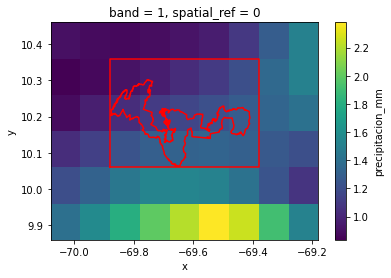

In [8]:
import matplotlib.pyplot as plt

# plot the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.add_collection(precipitacion_rds.sel(band=1).precipitacion_mm.plot())

x1,y1 = park_poligono.geometry.iloc[0].exterior.xy

ax.plot(x1,y1,'-r')

x2,y2 = parque_rectangulo.geometry.iloc[0].exterior.xy

ax.plot(x2,y2,'-r')

#### Elevación

* Casrgando datos de la elevación.

In [32]:
elevacion_rds = rioxarray.open_rasterio('./cerro_saroche/SRTMGL3/elevacion.nc',
                              masked=True
                              )\
                              .squeeze()\
                              .to_dataset()

elevacion = elevacion_rds.rio.reproject(precipitacion_rds.rio.crs)
elevacion.rio.crs

CRS.from_wkt('GEOGCS["Coordinate System imported from GRIB file",DATUM["unnamed",SPHEROID["Sphere",6367470,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]')

In [33]:
from shapely.geometry import mapping

# elevacion del parque
elevacion_park = elevacion.rio.clip(park_poligono.geometry.apply(mapping),
                    all_touched=True,
                    from_disk=True)\
                    .squeeze()\
                    .chunk("auto")

elevacion_park

<xarray.Dataset>
Dimensions:      (y: 288, x: 562)
Coordinates:
  * y            (y) float64 10.3 10.3 10.3 10.3 ... 10.07 10.06 10.06 10.06
  * x            (x) float64 -69.88 -69.88 -69.88 ... -69.41 -69.41 -69.41
    band         int64 1
    spatial_ref  int64 0
Data variables:
    elevacion    (y, x) float32 dask.array<chunksize=(288, 562), meta=np.ndarray>

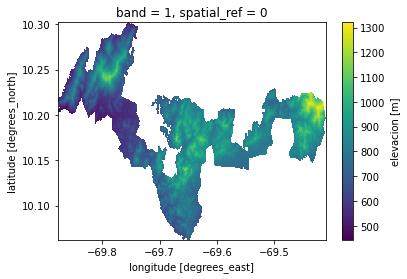

In [34]:
elevacion_park.elevacion.plot()

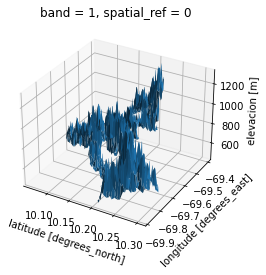

In [35]:
elevacion_park.elevacion.T.plot.surface()

In [36]:
elevacion_park.to_netcdf('./cerro_saroche/SRTMGL3/elevacion_cerro_saroche_clip.nc')

In [37]:
# elevacion del parque
elevacion_rect = elevacion.rio.clip(parque_rectangulo.geometry.apply(mapping),
                    all_touched=False,
                    from_disk=True)\
                    .squeeze()\
                    .chunk("auto")

elevacion_rect

<xarray.Dataset>
Dimensions:      (y: 360, x: 721)
Coordinates:
  * y            (y) float64 10.31 10.31 10.31 10.31 ... 10.01 10.01 10.01 10.01
  * x            (x) float64 -69.93 -69.93 -69.93 ... -69.33 -69.33 -69.33
    band         int64 1
    spatial_ref  int64 0
Data variables:
    elevacion    (y, x) float32 dask.array<chunksize=(360, 721), meta=np.ndarray>

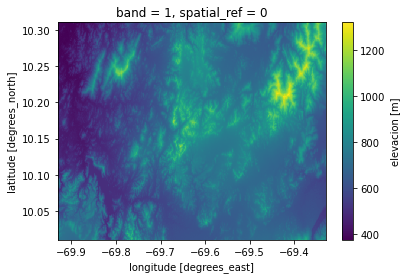

In [38]:
elevacion_rect.elevacion.plot()

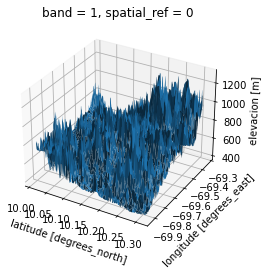

In [15]:
elevacion_rect.elevacion.T.plot.surface()

In [39]:
elevacion_rect.to_netcdf('./cerro_saroche/SRTMGL3/elevacion_rectangulo_clip.nc')

#### Regrillado elevación

##### Grilla Precipitación

In [17]:
import warnings
warnings.filterwarnings("ignore")


rds = precipitacion_rds
rds_trgrilla = elevacion
band = 'elevacion'
x_name='x'
y_name='y'

#def grilla_final(rds, rds_trgrilla, band, x_name='x', y_name='y'):

y = rds[y_name].to_numpy()
x = rds[x_name].to_numpy()

list_grid = []
for i, i_ in enumerate(y[:-1]):
  list_i = []
  for j, j_ in enumerate(x[:-1]):
    poly = Polygon( [(x[j],y[i,]),(x[j+1],y[i]),(x[j+1],y[i+1]),(x[j],y[i+1]),(x[j],y[i,])] )
    poligono = geopandas.GeoSeries(poly, crs = rds.rio.crs) 
    region = rds_trgrilla.rio.clip(poligono.geometry.apply(mapping),
                          all_touched=False,
                          from_disk=True)[band]
    list_i.append({ 'x':i_,
                    'y':j_,
                    'mean': float(region.mean()),
                    'median': float(region.median()),
                    'max': float(region.max()),
                    'centroide': (float(poligono.centroid.x), float(poligono.centroid.y))
                    }) 
  
  list_grid.append(list_i)

In [18]:
centroide_x = list(map(lambda x: [y.get('centroide')[0] for y in x] , list_grid))[0]
centroide_y = list(map(lambda x: [y.get('centroide')[1] for y in x][0] , list_grid))

media = list(map(lambda x: [y.get('mean') for y in x] , list_grid))
mediana = list(map(lambda x: [y.get('median') for y in x] , list_grid))
maximo = list(map(lambda x: [y.get('max') for y in x] , list_grid))

In [41]:
y.tolist()

[10.41, 10.31, 10.21, 10.11, 10.01, 9.91]

In [42]:
fieldset = [{
              "gridType": "regular_ll",
              # "Nx": len([round(x,2) for x in centroide_x]),
              # "Ny": len([round(y,2) for y in centroide_y]),
              # "distinctLatitudes": [round(y,2) for y in centroide_y],
              # "distinctLongitudes": [round(x,2) for x in centroide_x],
              "Nx": len(x.tolist()),
              "Ny": len(y.tolist()),
              "distinctLatitudes": y.tolist(),
              "distinctLongitudes": x.tolist(),
              "paramId": 1,
              "shortName": f"{band}_media",
              "values": media,
              "dataDate": 20211216,
              "dataTime": 1200
              },
              {
              "gridType": "regular_ll",
              # "Nx": len([round(x,2) for x in centroide_x]),
              # "Ny": len([round(y,2) for y in centroide_y]),
              # "distinctLatitudes":[round(y,2) for y in centroide_y],
              # "distinctLongitudes": [round(x,2) for x in centroide_x],
              "Nx": len(x.tolist()),
              "Ny": len(y.tolist()),
              "distinctLatitudes": y.tolist(),
              "distinctLongitudes": x.tolist(),
              "paramId": 2,
              "shortName": f"{band}_mediana",
              "values": mediana,
              "dataDate": 20211216,
              "dataTime": 1200
              },
              {
              "gridType": "regular_ll",
              # "Nx": len([round(x,2) for x in centroide_x]),
              # "Ny": len([round(y,2) for y in centroide_y]),
              # "distinctLatitudes": [round(y,2) for y in centroide_y],
              # "distinctLongitudes":[round(x,2) for x in centroide_x],
              "Nx": len(x.tolist()),
              "Ny": len(y.tolist()),
              "distinctLatitudes": y.tolist(),
              "distinctLongitudes": x.tolist(),
              "paramId": 3,
              "shortName": f"{band}_maxima",
              "values": maximo,
              "dataDate": 20211216,
              "dataTime": 1200
              }
              ]

ds = xarray.open_dataset(fieldset, engine="cfgrib")
ds = ds.rio.write_crs(precipitacion_rds.rio.crs)

ds.to_netcdf('./cerro_saroche/SRTMGL3/elevacion_regrilla.nc')

In [43]:
ds.rio.crs

CRS.from_wkt('GEOGCS["Coordinate System imported from GRIB file",DATUM["unnamed",SPHEROID["Sphere",6367470,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]')

In [44]:
ds

<xarray.Dataset>
Dimensions:            (latitude: 6, longitude: 9)
Coordinates:
    time               datetime64[ns] ...
  * latitude           (latitude) float64 10.41 10.31 10.21 10.11 10.01 9.91
  * longitude          (longitude) float64 -70.03 -69.93 ... -69.33 -69.23
    spatial_ref        int64 0
Data variables:
    elevacion_media    (latitude, longitude) float32 ...
    elevacion_mediana  (latitude, longitude) float32 ...
    elevacion_maxima   (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.7
    history:      2022-06-11T22:07 GRIB to CDM+CF via cfgrib-0.9.10.1/ecCodes...

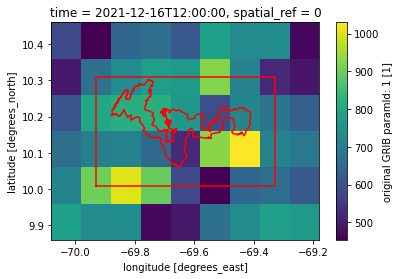

In [45]:
import matplotlib.pyplot as plt

# plot the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.add_collection(ds.elevacion_media.plot())

x1,y1 = park_poligono.geometry.iloc[0].exterior.xy

ax.plot(x1,y1,'-r')

x2,y2 = parque_rectangulo.geometry.iloc[0].exterior.xy

ax.plot(x2,y2,'-r')

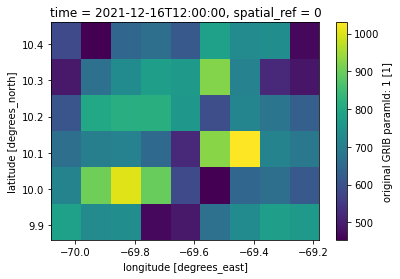

In [46]:
ds.elevacion_media.plot()

In [24]:
# elevacion del parque
ds_rect = ds.rio.clip(parque_rectangulo.geometry.apply(mapping),
                    all_touched=False,
                    from_disk=True)\
                    .squeeze()\
                    .chunk("auto")

#ds_rect.to_netcdf('./cerro_saroche/SRTMGL3/elevacion_regrilla.nc')

In [25]:
ds_rect

<xarray.Dataset>
Dimensions:            (latitude: 3, longitude: 6)
Coordinates:
  * latitude           (latitude) float64 10.26 10.16 10.06
  * longitude          (longitude) float64 -69.88 -69.78 ... -69.48 -69.38
    time               datetime64[ns] 2021-12-16T12:00:00
    spatial_ref        int64 0
Data variables:
    elevacion_media    (latitude, longitude) float32 dask.array<chunksize=(3, 6), meta=np.ndarray>
    elevacion_mediana  (latitude, longitude) float32 dask.array<chunksize=(3, 6), meta=np.ndarray>
    elevacion_maxima   (latitude, longitude) float32 dask.array<chunksize=(3, 6), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.7
    history:      2022-06-11T21:38 GRIB to CDM+CF via cfgrib-0.9.10.1/ecCodes...

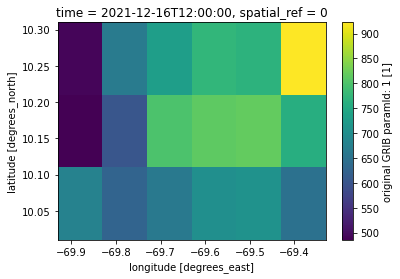

In [26]:
ds_rect.elevacion_media.plot()

In [27]:
ds_rect

<xarray.Dataset>
Dimensions:            (latitude: 3, longitude: 6)
Coordinates:
  * latitude           (latitude) float64 10.26 10.16 10.06
  * longitude          (longitude) float64 -69.88 -69.78 ... -69.48 -69.38
    time               datetime64[ns] 2021-12-16T12:00:00
    spatial_ref        int64 0
Data variables:
    elevacion_media    (latitude, longitude) float32 dask.array<chunksize=(3, 6), meta=np.ndarray>
    elevacion_mediana  (latitude, longitude) float32 dask.array<chunksize=(3, 6), meta=np.ndarray>
    elevacion_maxima   (latitude, longitude) float32 dask.array<chunksize=(3, 6), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.7
    history:      2022-06-11T21:38 GRIB to CDM+CF via cfgrib-0.9.10.1/ecCodes...

In [28]:
from cfgrib.xarray_to_grib import to_grib

#to_grib(ds_rect[['elevacion_mediana']], './cerro_saroche/SRTMGL3/elevacion_media.nc')#, grib_keys={'centre': 'ecmf'})
